<a href="https://colab.research.google.com/github/AIDataVisPro/Machine-Learning-AIML-IITK-SL/blob/main/3_PCA_%2C_Kfold%2CGridCV_and_RandCV_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal component analysis (PCA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
data.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],inplace=True)

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data=pd.get_dummies(data,dtype=int,drop_first=True)
data.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
data.isnull().sum()

survived        0
pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [ ]:
data.age.fillna(data.age.mean(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25540\3142462274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.age.fillna(data.age.mean(),inplace=True)


** RIGHT WAY OF DOING IT !!!**

# PCA with proper calculation

#### Finding PCA n_component right value

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data.shape

(891, 9)

In [ ]:
x=data.drop(columns="survived")
y=data.survived

In [ ]:
pc=PCA(n_components=8)

In [ ]:
x.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x,xt,y,yt=train_test_split(x,y,test_size=.10,random_state=42)

### Always scale down column

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms=MinMaxScaler()

In [ ]:
print(x.shape,"  ",xt.shape)

(720, 8)    (81, 8)


In [ ]:
x_tr_sc=mms.fit_transform(x)

In [ ]:
pd.DataFrame(x_tr_sc).head()

,0,1,2,3,4,5,6,7
0,1.0,0.472229,0.0,0.000000,0.016908,1.0,0.0,1.0
1,1.0,0.367921,0.0,0.000000,0.015127,1.0,1.0,0.0
2,1.0,0.233476,0.0,0.000000,0.028302,1.0,0.0,1.0
3,1.0,0.044986,0.0,0.166667,0.026188,0.0,0.0,0.0
4,1.0,0.367921,0.0,0.000000,0.015713,1.0,0.0,1.0


In [ ]:
x_test_sc=mms.transform(xt)


In [ ]:
pc

PCA(n_components=8)

In [ ]:
x_tr_pca=pc.fit_transform(x_tr_sc)

xplained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues)

In [ ]:
variance=pc.explained_variance_ratio_
variance

array([0.35884471, 0.27189705, 0.22412148, 0.06156324, 0.03764139,
       0.02481714, 0.01441385, 0.00670114])

In [ ]:
variance.round(decimals=4)*100

array([35.88, 27.19, 22.41,  6.16,  3.76,  2.48,  1.44,  0.67])

The cumulative explained variance shows the accumulation of variance for each principal component number. The individual explained variance describes the variance of each principal component.

Cumulative sums, or running totals, are used to display the total sum of data as it grows with time (or any other series or progression)

RUNNING TOTAL

In [ ]:
variance.cumsum().round(decimals=4)*100

array([ 35.88,  63.07,  85.49,  91.64,  95.41,  97.89,  99.33, 100.  ])

In [ ]:
#other way
import numpy as np

In [ ]:
np.cumsum(variance.round(decimals=4)*100)

array([35.88, 63.07, 85.48, 91.64, 95.4 , 97.88, 99.32, 99.99])

In [ ]:
cum_var=variance.cumsum().round(decimals=4)*100
cum_var

array([ 35.88,  63.07,  85.49,  91.64,  95.41,  97.89,  99.33, 100.  ])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 96, 'Threshold-cutoff-95%')

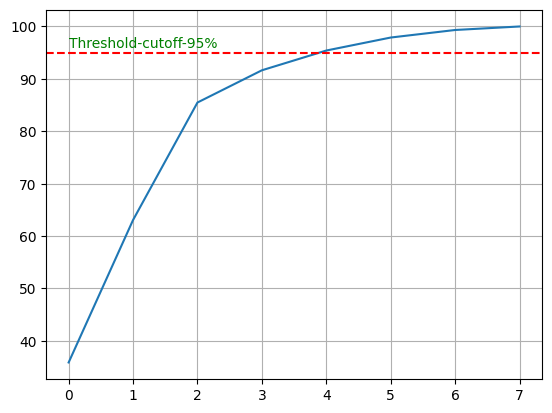

In [ ]:
plt.grid()
plt.plot(cum_var)
plt.axhline(color="r",y=95,linestyle="--")
plt.text(0,96,"Threshold-cutoff-95%",color="g")

In [ ]:
p=PCA(n_components=5)   # 5

In [ ]:
x_final=p.fit_transform(x_tr_sc)
x_test_final=p.transform(x_test_sc)

In [ ]:
pd.DataFrame(x_final).head()

,0,1,2,3,4
0,0.532283,-0.097327,0.134369,-0.004136,-0.152013
1,-0.245252,-1.139275,-0.040152,0.489755,0.038162
2,0.534878,-0.107820,0.166414,-0.048394,-0.018769
3,-0.781636,-0.335130,0.435723,-0.479372,0.029757
4,0.533825,-0.102253,0.148943,-0.023233,-0.094765


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_pc=RandomForestClassifier()

In [ ]:
rf_pc.fit(x_final,y)

RandomForestClassifier()

In [ ]:
res=rf_pc.predict(x_test_final)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(yt,res)

0.7777777777777778

### END

#### K Fold

In [ ]:
from sklearn.model_selection import cross_val_score # KFold

In [ ]:
y.value_counts()

survived
0    451
1    269
Name: count, dtype: int64

In [ ]:
res=cross_val_score(rf_pc,x_final,y,cv=5)
res

array([0.8125    , 0.76388889, 0.77083333, 0.82638889, 0.79861111])

In [ ]:
res.mean()

0.7944444444444445

#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
print(list(range(10,100,20)))

[10, 30, 50, 70, 90]


In [ ]:
grid_para={
    "n_estimators":[10, 30, 50, 70, 90,100,150,200,250,300,350,400,450,500],#default=100 The number of trees in the forest
    "criterion":['gini','entropy','log_loss'],
}

In [ ]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [ ]:
gr_cv=GridSearchCV(estimator=rf,
                   param_grid=grid_para,
                   cv=5,#
                   verbose=1
                  )

#### Code_will_take_sometime!!!

In [ ]:
%%time
gr_cv.fit(x,y)    # it takes Wall time: 3min 25s approx

Fitting 5 folds for each of 42 candidates, totalling 210 fits
CPU times: total: 2min
Wall time: 3min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [10, 30, 50, 70, 90, 100, 150, 200,
                                          250, 300, 350, 400, 450, 500]},
             verbose=1)

In [ ]:
gr_cv.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [ ]:
gr_cv.best_score_

0.8277777777777778

#### Random Search CV

In [ ]:
rf2=RandomForestClassifier()

In [ ]:
rscv=RandomizedSearchCV(estimator=rf2,
                        param_distributions=grid_para,
                       cv=5,#
                   verbose=1)#

In [ ]:
%%time
rscv.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 36 s
Wall time: 54.5 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [10, 30, 50, 70, 90,
                                                         100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   verbose=1)

In [ ]:
rscv.best_params_

{'n_estimators': 200, 'criterion': 'log_loss'}

In [ ]:
rscv.best_score_

0.826388888888889

END